# Análise de churn sobre o entendimento do negócio.

### Etapas da exploração de dados:
* __Importação das bibliotecas necessárias para o estudo.__
* __Dados estatísticos do dataset.__
* __Removendo features irrelevantes para o estudo em questão.__
* __Visualização de dados.__
* __Label Encoding.__
* __Entendimento do Negócio__
* __Estratégia - Redução de 4% de Churn.__
* __Machine Learning:__
* __Feature Scaling__
    * Decision Tree
    * Random Forest
    * XGBClassifier
* __Balance__
    * Over Sampling
    * Under Sampling

### Importação das bibliotecas necessárias para o estudo.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from skopt import dummy_minimize
from imblearn.over_sampling import *
import warnings
warnings.filterwarnings("ignore")
import missingno as missing
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# carregando o dataset
dataset = pd.read_csv('../Data/Churn_Modelling.csv', index_col='CustomerId')

In [3]:
# primeiras 5 linhas
dataset.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
15647311,2,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
15619304,3,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
15701354,4,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


### Dados estatísticos do dataset.

In [4]:
# decrição das variáveis categoricas.
dataset.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [5]:
# descrição das variáveis numéricas.
dataset.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [18]:
# verificando o tipo dos dados e se existem dados nulos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


### Removendo features irrelevantes para o estudo em questão.

In [6]:
dataset.drop(["RowNumber","Surname"], axis=1, inplace=True)

### Visualização de dados.

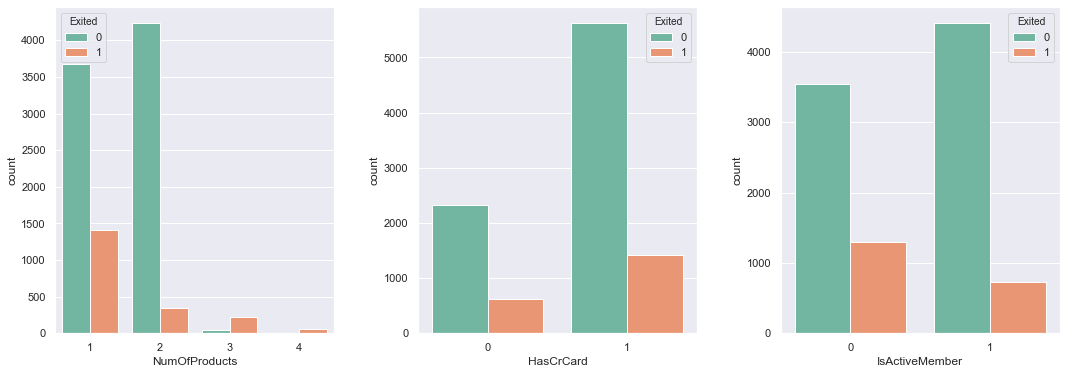

In [58]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2]);

* **Clientes com 3 e 4 produtos são altamente propensos ao Churn.**
* **Clientes com 2 produtos tem menos probabilidade de Churn.**
* **Clientes com 1 produto tem alta probabilidade de Churn.**

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

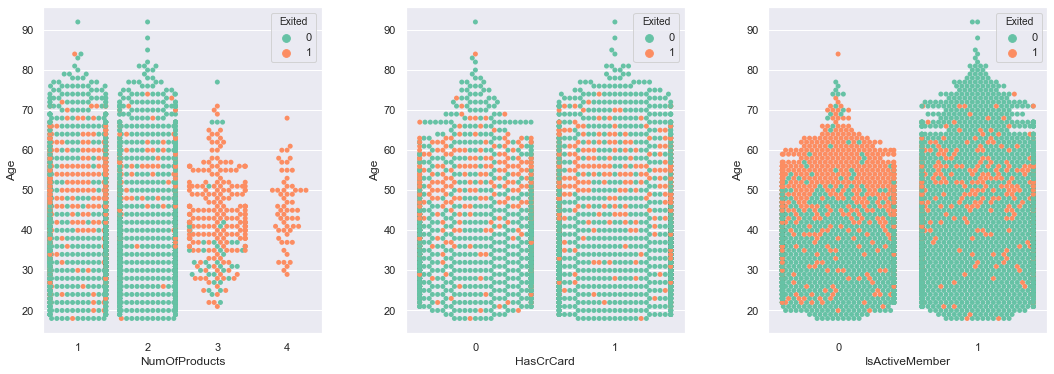

In [37]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[2]);

In [23]:
# O swarmplot é muito bom p. encontrar faixa de corte, de um total de 10000 temos cerca de 40850 clientes com pouquissíma probabilidade de churn.
# Podemos  remover futuramente essa fatia de clientes.
dataset.query('NumOfProducts == 2 & Age <= 45')['Exited'].value_counts()
#Total de Churn = 195 e Não Churn = 3656

0    3656
1     195
Name: Exited, dtype: int64

In [22]:
# Total de Churn = 2037 e Não Churn = 7963
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

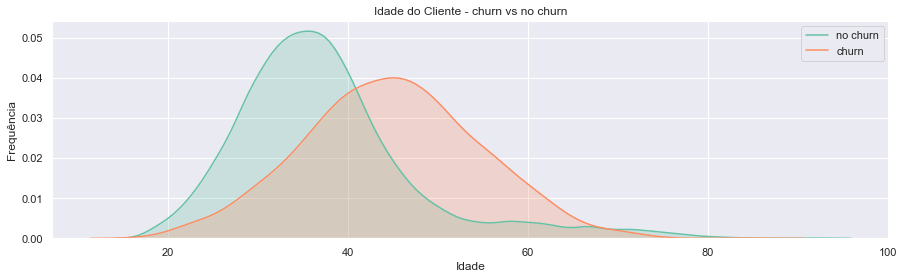

In [48]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 0),'Age'] ,
               shade=True,label='no churn') 
ax=sns.kdeplot(dataset.loc[(dataset['Exited'] == 1),'Age'] ,
               shade=True, label='churn') 
ax.set(xlabel='Idade', ylabel='Frequência') 
plt.title('Idade do Cliente - churn vs no churn') 

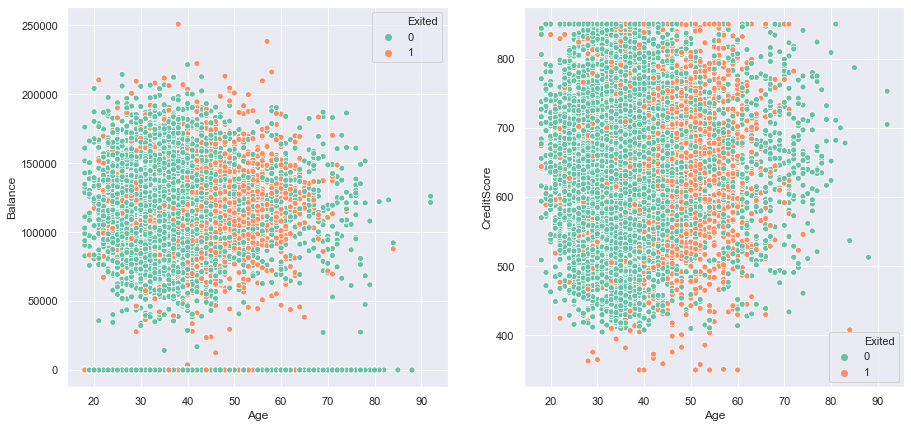

In [60]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1]);

### Label Encoding.

In [7]:
# Tranformação para dados binários
encoder = LabelEncoder()
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

In [8]:
# Visualizando e guardando o label encoder em uma variável
encoder_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
encoder_name_mapping

{'Female': 0, 'Male': 1}

In [9]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,0,42,2,0.000,1,1,1,101348.880,1
15647311,608,Spain,0,41,1,83807.860,1,0,1,112542.580,0
15619304,502,France,0,42,8,159660.800,3,1,0,113931.570,1
15701354,699,France,0,39,1,0.000,2,0,0,93826.630,0
15737888,850,Spain,0,43,2,125510.820,1,1,1,79084.100,0


### Entendimento do Negócio

In [76]:
#Criando um filtro todos os clientes com idada entre 40 e 70 anos
filtro = dataset.query('Age >= 40 & Age <= 70')

In [77]:
#Conferindo quantos clientes churn e não churn pertencem ao filtro.
filtro['Exited'].value_counts()
#Churn = 1429 e Não Churn = 2451

0    2451
1    1429
Name: Exited, dtype: int64

In [79]:
#Tamanho total do conjunto filtrado.
filtro.shape[0]
# Total = 3880

3880

In [80]:
# proporção em porcentagem do filtro.
round(filtro['Exited'].value_counts(normalize=True),2)

0   0.630
1   0.370
Name: Exited, dtype: float64

In [75]:
#proporção total de Churn sobre o conjunto inteiro
round(1429 / 2037,2)

0.7

In [81]:
# Churn e NO Churn do conjunto todo
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* **Digamos que a equipe de BI informou que esses 3880 clientes são os mais propensos ao Churn**
* **Então o restante 10000 - 3880 = 6120 são os clientes que não nos dão preocupação no momento**
* **Vamos calcular qual a taxa de acerto(recall) e precisão que conseguimos com esse filtro**
* **Para o calculo vamos usar a matriz de confusão conforme abaixo:**

|Matriz de Confusão |Descrição|
|:--- |:--- |
|VP = verdadeiro positivo | Modelo informou que era Churn e realmente era Churn. | 
|VN = verdadeiro negativo | Modelo informou que não era Churn e realmente não era Churn. | 
|FP = falso positivo      | Modelo informou que era Churn e errou. | 
|FN = falso negativo      | Modelo informou que não era Churn e errou. |


|                  | __Churn__       | __No Churn__   |     __Total Real__ |
|   :---           |   :---:         |     :---:      |         :---:      |
| __Churn__        |  __VP: 1429__   |   __FN: 608__  |       __2037__     |
| __No Churn__     |  __FP: 2451__   |   __VN: 5512__ |       __7963__     |
| __Total Predito__|     __3880__    |      __6120__  |       __10.000__   |
 




* O Filtro nos informa que 5512(VN) dos 10 mil clientes foram classificados corretamente como clientes que não sairam.
* Nos informa que  608(FN) clientes foram classificados, como clientes que não iriam sair mas eles sairam.
* O filtro informa que 2451(FP) dos 10mil clientes iriam sair mas estava errado e os clientes não sairam.
* O filtro informa que 1429(VP) que iriam sair e realmente eles saíram.

### Agora com esses dados podemos calcular o F1 Score, o recall e a precisão. Vale lembrar que a soma dos valores deve ser igual ao número total de clientes.

* __Fórmulas:__

***********************************

* __Acurácia = (vp + vn) / (vp + fn + vn + fp)__
* __Recall(Sensibilidade) = recall = vp / (vp + fn)__
* __Especificiade = vn / (vn + fp)__
* __Precisão = vp / (vp + fp)__
* __f1 = 2 * ((precisão * recall) / (precisão + recall))__


In [10]:
# Classe que nos interessa = 1
vp = 1429  
fn = 608
fp = 2451  
vn = 5512

In [11]:
def metricas(vp,fn,fp,vn):
    acc = round((vp + vn) / (vp + fn + vn + fp),2)
    recall = round(vp / (vp + fn),2)
    precision = round(vp / (vp + fp),2)
    f1 = 2 * round((precision * recall) / (precision + recall),2)
    return(print(f'*****Métricas*****\n\nAcurácia:{acc}\nRecall:{recall}\nPrecisão:{precision}\nF1:{f1}\n'))

In [12]:
metricas(vp,fn,fp,vn)

*****Métricas*****

Acurácia:0.69
Recall:0.7
Precisão:0.37
F1:0.48



* **Conclusão:**
* Dentro do filtro de clientes com idade entre 40 e 70 anos, temos uma lista de 3880 clientes. 38,8% de toda a base.
* Desses 3880 clientes 1429 são os clientes que sairam. Precisão de 37%.
* Os 1429 clientes representam 70% de todos os clientes que realmente sairam de toda a base de dados. Recall de 70%.
* O f1 score é uma média harmônica entre a precisão e recall. F1 de 48%.
* Então podemos dizer dentro do conjunto de 10mil clientes, conseguimos acertar 70% dos clientes que saíram com um filtro de apenas 3880 clientes e uma precisão de 37%, ou seja a cada 10 clientes eu acerto +- 4 clientes que realmente saíram.

In [13]:
Ticket_medio_balance = round(dataset.Balance.mean(),2)
print(f'O ticket médio em caixa de cada cliente, incluindo os que não possuem saldo em conta foi de:{Ticket_medio_balance}Euros')

O ticket médio em caixa de cada cliente, incluindo os que não possuem saldo em conta foi de:76485.89Euros


In [14]:
# conferindo a média
76500 * 10000

765000000

In [15]:
# soma de todo capital com saldo em banco dos clientes
round(dataset.Balance.sum(),2)

764858892.88

* Nesse estudo vamos levar em consideração apenas o saldo que o cliente possui, como recurso de capitalização onde o banco aloca parte desse capital em empréstimos de setores diversos buscando rentabilidde com as altas taxas de juros.
* Não iremos levar em consideração pacote de serviços, taxa de juros com cartão entre outros, pois não temos informações suficientes para abordar esses assuntos. 

* Bom então sabemos que cada cliente possue em média 76.500,00 euros.
* Se durante o ano tivemos um taxa de churn de  +- 20% de clientes, significa que em média o banco deixou de capitalizar: 155.830.500,00 Euros, mas não foi bem isso o que aconteceu, vamos analisar.

In [16]:
#Conferindo quantos clientes sairam e quantos permaneceram.
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
#quantidade de clientes que sairam X ticket_medio_balance.
2037 * 76500

155830500

In [18]:
#Quanto que realmente o banco perdeu em balance.
round(dataset.query('Exited ==1')['Balance'].sum(),2)

185588094.63

In [19]:
# O banco perdeu em saldo cerca de 19% a mais do que o previsto pelo ticket_medio em balance.
round(((185588094.63 / 155830500)-1) * 100,2)

19.1

* Podemos concluir que o banco tem uma perda maior do que o ticket médio de saldo em conta, cercar 19% a mais do que o previsto, qual o motivo?
* Vamos analisar....

In [20]:
# Verificando como seria a média de balance sem contar os clientes que não possuem saldo em conta.
dataset.query('Balance != 0')['Balance'].mean()

119827.49379288674

* Veja que a média de balance passou de 75.500 euros para algo próximo de 120.000 euros por cliente.
* Podemos confirmar que tivemos uma perda maior, pois sairam(churn) mais clientes com saldo em conta do que o contrário.
* Clientes sem saldo acabam empurrando a média de balance para baixo e isso pode impactar, como comprovado acima.
* Para Alemanha a média de 120mil é confirmada, pois não tempos clientes sem saldo em conta para essa região.
* Dessa forma perder um cliente da Alemanha praticamente tem peso em dobro do que os demais países.


In [22]:
# Média de Balance da Espanha e França.
round(dataset.query('Geography != "Germany"')['Balance'].mean(),2)

62001.87

In [23]:
# Média de Balance da Alemanha
round(dataset.query('Geography == "Germany"')['Balance'].mean(),2)

119730.12

* Em contato com a àrea de negócios, recebemos alguns indicadores que irão nos auxiliar no melhor entendimento do negócio são elas:
* __CAC__ - Custo de aquisição de Clientes : Basicamente esse indicador mede quanto que a equipe de marketing gasta em média por aquisição de novos clientes.
* __TC__ - Taxa de Conversão: indica o percentual de clientes convertidos após uma campanha de uma determinada demanda.

***************
* CAC = 10.000 Euros
* TC = 1%

* Com esses dois indicadores podemos concluir que a cada 100 contatos(de diferentes formas) a equipe consegue prospectar 1 cliente novo. E que foram gastos na campanha, seja com e-mail marketing, contato direto, funcionários equipamentos etc, um total de 10.000 euros.

* __Custo de retenção__: 1500 Euros ( custo por cliente para retenção).
* __Taxa de retenção__:79.63%
* Quantidade de Clientes novos no período = 2037 novos clientes.
****************
* total de clientes
* novos clientes no período
* numero de clientes do início do período

* taxa de retenção = ((total de clientes no periodo - novos clientes no período) / Total de clientes no início do periodo)) * 100
* taxa de retenção = 79,63%

In [24]:
# informações obtidas.
total_de_clientes_novos_no_periodo = 2037
total_de_clientes_no_periodo = 7963 + total_de_clientes_novos_no_periodo
total_de_clientes_no_periodo_inicial = 10000


In [25]:
#Calculo da taxa de retenção
taxa_retencao = round((total_de_clientes_no_periodo - total_de_clientes_novos_no_periodo) / total_de_clientes_no_periodo_inicial * 100,2)
print(f'A taxa de retenção no período foi de: {taxa_retencao}%')

A taxa de retenção no período foi de: 79.63%


In [26]:
# Quanto que a empresa gastou com retenção?
total_de_clientes_retidos = total_de_clientes_no_periodo - total_de_clientes_novos_no_periodo
total_gasto_retencao = round(total_de_clientes_retidos * 1500,2)
print(f'Para o banco reter:{total_de_clientes_retidos} Clientes, foram gastos um total de:{total_gasto_retencao} euros')

Para o banco reter:7963 Clientes, foram gastos um total de:11944500 euros


In [27]:
# Quanto a empresa precisa investir apenas para manter o equilibrio de 10 mil funcionários?
CAC = 10000
CAC_Total = round(total_de_clientes_novos_no_periodo * CAC,2)
print(f'Para o banco manter o equilibrio foram contratatos:{total_de_clientes_novos_no_periodo} Clientes novos, com um custo total de:{CAC_Total} euros')

Para o banco manter o equilibrio foram contratatos:2037 Clientes novos, com um custo total de:20370000 euros


* Foram gastos um total de 11.944.500 euros para retenção de 79,63% dos clientes.
* Foram necessários um total de 20.370.000 euros, para prospecção de 2037 novos clientes, quase o dobro do total investido na retenção dos 7963 clientes.
* __Reduzir 1% de churn representa uma economia de 850.000 euros para aquisição de novos clientes.__

* Podemos entender que, de 100 clientes conseguimos manter cerca de 80, com um custo médio de 1.500 euros por cliente.
* Dessa forma, manter um cliente, tem um custo até 7 vezes menor, do que prospectar um novo ao custo de 10mil euros.
* Entendemos dessa forma que, tão importante quanto prospectar novos clientes são mantê-los. 
* A estratégia desse estudo será identificar o perfil dos clientes com maior propensão ao churn para que a àrea de negócios, possa direcionar seus esforços com uma maior acertividade, visando diminuir o Churn e consequentemente aumentar a taxa de retenção.
* O estudo prevê uma redução significativa de recursos para aquisição de novos clientes e aumento na taxa de retenção.

### Estratégia - Redução de 4% de Churn.

* Com a base reduzida, podemos usar o contato direto para resolver a dor desses clientes e entender o que levam os mesmo a cancelarem os serviços/produtos - CX.
* Direcionar os clientes com maior propensão para os consultores certos, visando melhorar a experiência e satisfação. 
* Ofertar os produtos/descontos certos para o cliente certo, através de indicadores. Um exemplo, quando um cliente entra em contato o sistema informa uma bandeira(vermelha, amarela, verde) no painel do consultor com os devidos produtos/descontos já mapeados de acordo com cada perfil. 
* Criar novos indicadores como NPS e acompanhar o percentual de retenção desses clientes em período menores.
* Com novos indicadores e com o acompanhamento de período menores, o modelo pode ser retreinado e assim atingir um melhor desempenho.

### __Vamos verifica as correlações__

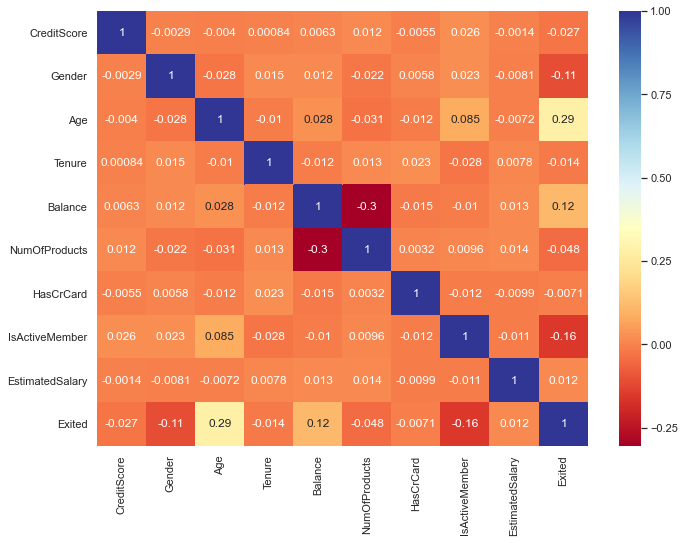

In [28]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()

### Machine Learning:

In [35]:
# Carregando os dados que foram separados para treino e validação
df_treino = pd.read_csv('../treino_base.csv', index_col=['CustomerId'])
df_valid = pd.read_csv('../validação_base.csv',index_col=['CustomerId'])
display(df_treino, df_valid)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15594902,518,France,Male,38,3,90957.810,1,0,1,162304.590,0
15674551,535,Germany,Male,40,7,111756.500,1,1,0,8128.320,1
15668695,536,France,Female,22,5,89492.620,1,0,0,42934.430,0
15748589,736,France,Female,30,9,0.000,2,1,0,34180.330,0
15771222,779,France,Female,42,5,0.000,2,0,0,25951.910,0
...,...,...,...,...,...,...,...,...,...,...,...
15739514,659,France,Female,32,9,0.000,2,1,1,93155.750,0
15626628,631,Spain,Female,31,2,88161.850,2,1,0,127630.880,0
15695465,638,France,Female,36,6,0.000,1,1,0,164247.510,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15731755,680,France,Male,49,10,0.000,2,1,0,187008.450,0
15632576,520,France,Male,31,4,93249.400,1,1,0,77335.750,0
15651955,603,France,Male,31,4,0.000,2,0,1,9607.100,0
15697310,559,Germany,Female,28,3,152264.810,1,0,0,64242.310,0
15792360,668,France,Male,32,7,0.000,2,1,1,777.370,0
...,...,...,...,...,...,...,...,...,...,...,...
15777772,650,Spain,Male,55,9,119618.420,1,1,1,29861.130,0
15670602,790,Germany,Male,24,7,107418.270,1,0,1,160450.210,0
15592531,822,France,Male,50,7,0.000,2,1,1,10062.800,0


### Label Encoder 

In [36]:
encoder = LabelEncoder()
#df_treino["Geography"] = encoder.fit_transform(df_treino["Geography"])
df_treino["Gender"] = encoder.fit_transform(df_treino["Gender"])
#df_valid["Geography"] = encoder.fit_transform(df_valid["Geography"])
df_valid["Gender"] = encoder.fit_transform(df_valid["Gender"])
display(df_treino.head(), df_valid.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15594902,518,France,1,38,3,90957.810,1,0,1,162304.590,0
15674551,535,Germany,1,40,7,111756.500,1,1,0,8128.320,1
15668695,536,France,0,22,5,89492.620,1,0,0,42934.430,0
15748589,736,France,0,30,9,0.000,2,1,0,34180.330,0
15771222,779,France,0,42,5,0.000,2,0,0,25951.910,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15731755,680,France,1,49,10,0.000,2,1,0,187008.450,0
15632576,520,France,1,31,4,93249.400,1,1,0,77335.750,0
15651955,603,France,1,31,4,0.000,2,0,1,9607.100,0
15697310,559,Germany,0,28,3,152264.810,1,0,0,64242.310,0
15792360,668,France,1,32,7,0.000,2,1,1,777.370,0


### Dummieficação

In [37]:
df_treino = pd.get_dummies(df_treino,columns=['Geography'],drop_first=False)
df_valid = pd.get_dummies(df_valid,columns=['Geography'],drop_first=False)

# Conferindo a transformação
display(df_treino.head(2), df_valid.head(2))

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15594902,518,1,38,3,90957.810,1,0,1,162304.590,0,1,0,0
15674551,535,1,40,7,111756.500,1,1,0,8128.320,1,0,1,0


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15731755,680,1,49,10,0.000,2,1,0,187008.450,0,1,0,0
15632576,520,1,31,4,93249.400,1,1,0,77335.750,0,1,0,0


In [141]:
# Separando a target.
X = df_treino.drop(["Exited"], axis=1)
y = df_treino["Exited"]

In [142]:
# Separando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [143]:
# conferindo o tamanho dos conjuntos.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 12), (2400, 12), (5600,), (2400,))

* **Nosso objetivo é bater a performace da análise de BI onde com um simples filtro foi possível atingir as seguintes métricas:**
* **F1 = 48**
* **Recall = 70%**
* **Precisão = 37%**

* **Meta principal é encontrar um melhor equilibrio entre o recall e a precisão.**

### Feature Scaling.

In [165]:
# MinMax.
scaler = MinMaxScaler() 

scaler_cols = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_scaled = pd.DataFrame(data = X)
df_scaled[scaler_cols] = scaler.fit_transform(X[scaler_cols])


In [203]:
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,
15594902,0.336,1,0.270,3,0.363,1,0,1,0.812,1,0,0
15674551,0.370,1,0.297,7,0.445,1,1,0,0.041,0,1,0
15668695,0.372,0,0.054,5,0.357,1,0,0,0.215,1,0,0
15748589,0.772,0,0.162,9,0.000,2,1,0,0.171,1,0,0
15771222,0.858,0,0.324,5,0.000,2,0,0,0.130,1,0,0


In [167]:
# MInMax no conjunto de validação.
scaler = MinMaxScaler() 

scaler_cols = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_val_scaled = pd.DataFrame(data = df_valid)
df_val_scaled[scaler_cols] = scaler.fit_transform(df_valid[scaler_cols])
df_val_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15731755,0.660,1,0.470,10,0.000,2,1,0,0.935,0,1,0,0
15632576,0.340,1,0.197,4,0.391,1,1,0,0.386,0,1,0,0
15651955,0.506,1,0.197,4,0.000,2,0,1,0.047,0,1,0,0
15697310,0.418,0,0.152,3,0.639,1,0,0,0.321,0,0,1,0
15792360,0.636,1,0.212,7,0.000,2,1,1,0.003,0,1,0,0


### Decision Tree

In [147]:
# Modelo de arvore de decisão. 
# modelo não atinge o nosso objetivo.
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1898
           1       0.49      0.52      0.51       502

    accuracy                           0.79      2400
   macro avg       0.68      0.69      0.68      2400
weighted avg       0.79      0.79      0.79      2400



### Random Forest

In [148]:
# Modelo random Forest.
# Atinge o nosso objetivo em partes pois ao melhorar a precisão em 77% só conseguimos um recall de 45%
clf = RandomForestClassifier(n_estimators = 1000, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1898
           1       0.77      0.45      0.57       502

    accuracy                           0.86      2400
   macro avg       0.82      0.71      0.74      2400
weighted avg       0.85      0.86      0.84      2400



### XGBClassifier

In [91]:
#Modelo XGBClassifier
#Não performou melhor que o RF
clf  = XGBClassifier(max_depth = 10,random_state = 777, n_estimators=1000, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1898
           1       0.66      0.45      0.54       502

    accuracy                           0.84      2400
   macro avg       0.76      0.70      0.72      2400
weighted avg       0.82      0.84      0.83      2400



### Balance com todo o conjunto de treino

<AxesSubplot:xlabel='Exited', ylabel='count'>

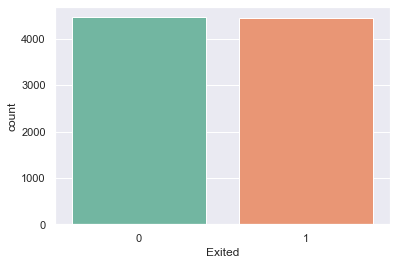

In [212]:
# proporção antes do balanceamento.
sns.countplot(y_train)

### Over sampling

In [204]:
# over sample com smote
X = df_scaled
sm  = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.3, random_state=7)

<AxesSubplot:xlabel='Exited', ylabel='count'>

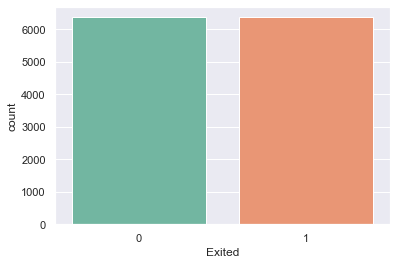

In [205]:
# proporção após o balanceamento.
sns.countplot(y_res)

In [207]:
# Modelo balanceado com XGBClassifier
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=1000, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1906
           1       0.90      0.88      0.89      1916

    accuracy                           0.89      3822
   macro avg       0.89      0.89      0.89      3822
weighted avg       0.89      0.89      0.89      3822



* **Com o balanceamento tivemos uma melhora significativa, porém aqui estamos testando dentro da fatia do conjunto balanceado de teste, ou seja, esse não é o nosso conjunto real.**
* **Vamos verificar o resultado com o conjunto real e ver a performaçe.**

In [208]:
valid_X = df_val_scaled.drop(['Exited'], axis=1)
valid_y = df_val_scaled['Exited']

In [209]:
all_pred = clf.predict(valid_X)
print(classification_report(valid_y, all_pred))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1593
           1       0.34      0.80      0.48       407

    accuracy                           0.65      2000
   macro avg       0.63      0.71      0.61      2000
weighted avg       0.81      0.65      0.68      2000



* **Como podem ver o conjunto real de teste o modelo foi muito bem no recall e encontrou 84% de churn de toda a base**.
* **Mas isso gerou um custo e a precisão ficou em 34% e f1 em 48%.**
* **Sendo assim o modelo não atende os requisitos desejados que nesse caso é um equilíbrio entre o recall e a precisão.**.

In [210]:
np.bincount(all_pred)

array([1052,  948], dtype=int64)

In [211]:
# Confusion Matrix
confusion_matrix(valid_y, all_pred)

array([[972, 621],
       [ 80, 327]], dtype=int64)

### Under sampling

In [218]:
 from imblearn.under_sampling import * 

<AxesSubplot:xlabel='Exited', ylabel='count'>

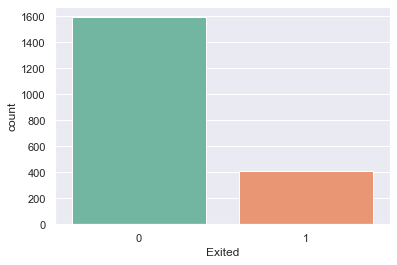

In [219]:
#antes do balanceamento
sns.countplot(valid_y)

In [220]:

sm  = TomekLinks()
X_res, y_res = sm.fit_resample(X, y)

In [221]:
X_res.shape, y_res.shape

((7528, 12), (7528,))

<AxesSubplot:xlabel='Exited', ylabel='count'>

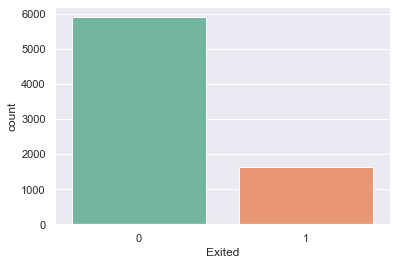

In [222]:
# proporção após o balanceamento.
sns.countplot(y_res)

In [223]:
from lightgbm import LGBMClassifier

In [234]:
# Modelo balanceado com XGBClassifier
# Melhor modelo até o momento
LGBM = LGBMClassifier(max_depth = 12,random_state=7, n_estimators=1000, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
LGBM.fit(X_train,y_train)

y_pred = LGBM.predict(X_test)
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Unknown parameter: eval_metric
Area under precision (AUC) Recall: 0.8610867390097843
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1906
           1       0.91      0.88      0.89      1916

    accuracy                           0.90      3822
   macro avg       0.90      0.90      0.90      3822
weighted avg       0.90      0.90      0.90      3822



<AxesSubplot:ylabel='count'>

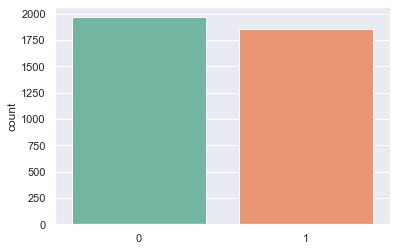

In [227]:
#predição.
sns.countplot(y_pred)

<AxesSubplot:xlabel='Exited', ylabel='count'>

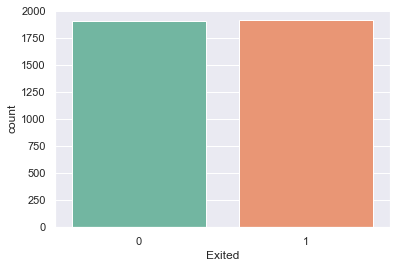

In [229]:
#teste.
sns.countplot(y_test)

In [230]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[1739,  167],
       [ 229, 1687]], dtype=int64)

In [231]:
recall_score(y_test, y_pred)

0.8804801670146137

In [232]:
precision_score(y_test, y_pred)

0.9099244875943905

* **Verificando no conjunto de validação**

In [235]:
valid_X = df_val_scaled.drop(['Exited'], axis=1)
valid_y = df_val_scaled['Exited']

In [236]:
valid_pred = LGBM.predict(valid_X)
print(classification_report(valid_y, valid_pred))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1593
           1       0.31      0.86      0.46       407

    accuracy                           0.59      2000
   macro avg       0.62      0.69      0.56      2000
weighted avg       0.81      0.59      0.63      2000

